In [2]:
import pandas as pd

# Load datasets
sentiment = pd.read_csv("fear_greed_index.csv")
trades = pd.read_csv("historical_data.csv")

print("========== SENTIMENT DATA AUDIT ==========")

print("\nShape:", sentiment.shape)

print("\nData Types:")
print(sentiment.dtypes)

print("\nMissing Values:")
print(sentiment.isnull().sum())

print("\nDuplicate Rows:", sentiment.duplicated().sum())

# Basic cleaning (strip spaces if any in classification)
sentiment['classification'] = sentiment['classification'].str.strip()

print("\nSample:")
print(sentiment.head())


print("\n\n========== TRADES DATA AUDIT ==========")

print("\nShape:", trades.shape)

print("\nData Types:")
print(trades.dtypes)

print("\nMissing Values:")
print(trades.isnull().sum())

print("\nDuplicate Rows:", trades.duplicated().sum())

print("\nSample:")
print(trades.head())
print(sentiment.head())

========== SENTIMENT DATA AUDIT ==========

Shape: (2644, 4)

Data Types:
timestamp          int64
value              int64
classification    object
date              object
dtype: object

Missing Values:
timestamp         0
value             0
classification    0
date              0
dtype: int64

Duplicate Rows: 0

Sample:
    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05


========== TRADES DATA AUDIT ==========

Shape: (211224, 16)

Data Types:
Account              object
Coin                 object
Execution Price     float64
Size Tokens         float64
Size USD            float64
Side                 object
Timestamp IST        object
Start Position      float64
Direction            object
Closed PnL          float64
Transaction Hash     object
Or

In [3]:
import pandas as pd

# Reload fresh copies
sentiment = pd.read_csv("fear_greed_index.csv")
trades = pd.read_csv("historical_data.csv")

print("BEFORE CLEANING\n")
print("Sentiment date dtype:", sentiment['date'].dtype)
print("Trades Timestamp dtype:", trades['Timestamp'].dtype)
print("Trade ID dtype:", trades['Trade ID'].dtype)


# =========================
# SENTIMENT CLEANING
# =========================

# Convert date to datetime
sentiment['date'] = pd.to_datetime(sentiment['date'])

# Convert timestamp (seconds → datetime)
sentiment['timestamp'] = pd.to_datetime(sentiment['timestamp'], unit='s')

# Strip classification spaces
sentiment['classification'] = sentiment['classification'].str.strip()


# =========================
# TRADES CLEANING
# =========================

# Convert Timestamp (milliseconds → datetime)
trades['Timestamp'] = pd.to_datetime(trades['Timestamp'], unit='ms')

# Convert Trade ID to integer
trades['Trade ID'] = trades['Trade ID'].astype('int64')

# Standardize Direction
trades['Direction'] = trades['Direction'].str.upper()


print("\nAFTER CLEANING\n")
print("Sentiment date dtype:", sentiment['date'].dtype)
print("Sentiment timestamp dtype:", sentiment['timestamp'].dtype)
print("Trades Timestamp dtype:", trades['Timestamp'].dtype)
print("Trade ID dtype:", trades['Trade ID'].dtype)

print("\nSample Cleaned Trades:")
print(trades[['Timestamp','Trade ID','Direction']].head())

BEFORE CLEANING

Sentiment date dtype: object
Trades Timestamp dtype: float64
Trade ID dtype: float64

AFTER CLEANING

Sentiment date dtype: datetime64[ns]
Sentiment timestamp dtype: datetime64[ns]
Trades Timestamp dtype: datetime64[ns]
Trade ID dtype: int64

Sample Cleaned Trades:
            Timestamp          Trade ID Direction
0 2024-10-27 03:33:20   895000000000000       BUY
1 2024-10-27 03:33:20   443000000000000       BUY
2 2024-10-27 03:33:20   660000000000000       BUY
3 2024-10-27 03:33:20  1080000000000000       BUY
4 2024-10-27 03:33:20  1050000000000000       BUY


In [4]:
trades.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,BUY,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,895000000000000,2024-10-27 03:33:20
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,BUY,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,443000000000000,2024-10-27 03:33:20
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,BUY,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,660000000000000,2024-10-27 03:33:20
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,BUY,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1080000000000000,2024-10-27 03:33:20
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,BUY,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1050000000000000,2024-10-27 03:33:20


In [5]:
sentiment.head()

,timestamp,value,classification,date
0,2018-02-01 05:30:00,30,Fear,2018-02-01
1,2018-02-02 05:30:00,15,Extreme Fear,2018-02-02
2,2018-02-03 05:30:00,40,Fear,2018-02-03
3,2018-02-04 05:30:00,24,Extreme Fear,2018-02-04
4,2018-02-05 05:30:00,11,Extreme Fear,2018-02-05


In [6]:
import pandas as pd

# Reload fresh data
sentiment = pd.read_csv("fear_greed_index.csv")
trades = pd.read_csv("historical_data.csv")

# =========================
# 1️⃣ FIX TRADES TIMESTAMP IST
# =========================

# Convert to datetime (correct format given in your data)
trades['Timestamp IST'] = pd.to_datetime(
    trades['Timestamp IST'],
    format="%d-%m-%Y %H:%M"
)

# Remove hours (keep only date)
trades['Timestamp IST'] = trades['Timestamp IST'].dt.normalize()


# =========================
# 2️⃣ FIX SENTIMENT TIMESTAMP
# =========================

# Convert unix (seconds → datetime)
sentiment['timestamp'] = pd.to_datetime(
    sentiment['timestamp'],
    unit='s'
)

# Remove hours
sentiment['timestamp'] = sentiment['timestamp'].dt.normalize()


# =========================
# 3️⃣ CHECK DATA TYPES
# =========================

print("Trades Timestamp IST dtype:", trades['Timestamp IST'].dtype)
print("Sentiment timestamp dtype:", sentiment['timestamp'].dtype)


# =========================
# 4️⃣ CHECK MIN & MAX DATE
# =========================

print("\n===== TRADES DATE RANGE =====")
print("Min:", trades['Timestamp IST'].min())
print("Max:", trades['Timestamp IST'].max())

print("\n===== SENTIMENT DATE RANGE =====")
print("Min:", sentiment['timestamp'].min())
print("Max:", sentiment['timestamp'].max())

Trades Timestamp IST dtype: datetime64[ns]
Sentiment timestamp dtype: datetime64[ns]

===== TRADES DATE RANGE =====
Min: 2023-05-01 00:00:00
Max: 2025-05-01 00:00:00

===== SENTIMENT DATE RANGE =====
Min: 2018-02-01 00:00:00
Max: 2025-05-02 00:00:00


In [7]:
# =========================
# 1. FILTER BOTH → COMMON PERIOD
# =========================

start_date = '2023-05-01'
end_date   = '2025-05-01'

trades_common = trades[
    (trades['Timestamp IST'] >= start_date) &
    (trades['Timestamp IST'] <= end_date)
]

sentiment_common = sentiment[
    (sentiment['timestamp'] >= start_date) &
    (sentiment['timestamp'] <= end_date)
]

print("Trades after filter:", trades_common.shape)
print("Sentiment after filter:", sentiment_common.shape)


# =========================
# 2. CREATE DAILY TRADE METRICS
# =========================

daily_trades = trades_common.groupby('Timestamp IST').agg({
    'Closed PnL': 'sum',      # daily total profit
    'Trade ID': 'count',      # number of trades
    'Size USD': 'mean'        # avg trade size
}).reset_index()

daily_trades.rename(columns={
    'Closed PnL': 'daily_total_pnl',
    'Trade ID': 'num_trades',
    'Size USD': 'avg_trade_size'
}, inplace=True)

print("\nDaily trades sample:")
print(daily_trades.head())


# =========================
# 3. MERGE ON DATE
# =========================

merged_data = pd.merge(
    daily_trades,
    sentiment_common,
    left_on='Timestamp IST',
    right_on='timestamp',
    how='inner'
)

print("\nMerged Shape:", merged_data.shape)
print("\nMerged Sample:")
print(merged_data.head())

Trades after filter: (211224, 16)
Sentiment after filter: (731, 4)

Daily trades sample:
  Timestamp IST  daily_total_pnl  num_trades  avg_trade_size
0    2023-05-01         0.000000           3      159.000000
1    2023-12-05         0.000000           9     5556.203333
2    2023-12-14      -205.434737          11    10291.213636
3    2023-12-15       -24.632034           2     5304.975000
4    2023-12-16         0.000000           3     5116.256667

Merged Shape: (479, 8)

Merged Sample:
  Timestamp IST  daily_total_pnl  num_trades  avg_trade_size  timestamp  \
0    2023-05-01         0.000000           3      159.000000 2023-05-01   
1    2023-12-05         0.000000           9     5556.203333 2023-12-05   
2    2023-12-14      -205.434737          11    10291.213636 2023-12-14   
3    2023-12-15       -24.632034           2     5304.975000 2023-12-15   
4    2023-12-16         0.000000           3     5116.256667 2023-12-16   

   value classification        date  
0     63        

In [8]:
# =========================
# PERFORMANCE BY SENTIMENT
# =========================

performance_by_sentiment = merged_data.groupby('classification').agg({
    'daily_total_pnl': 'mean',
    'num_trades': 'mean',
    'avg_trade_size': 'mean'
}).sort_values(by='daily_total_pnl', ascending=False)

print(performance_by_sentiment)

                daily_total_pnl   num_trades  avg_trade_size
classification                                              
Extreme Fear       52793.589178  1528.571429     4091.804366
Fear               36891.818040   679.527473     6524.294937
Extreme Greed      23817.292199   350.807018     4410.524482
Neutral            19297.323516   562.477612     7157.527121
Greed              11140.566181   260.637306     6735.295813


In [9]:
analysis_summary = merged_data.groupby('classification').agg(
    avg_daily_pnl = ('daily_total_pnl','mean'),
    median_daily_pnl = ('daily_total_pnl','median'),
    avg_trades = ('num_trades','mean'),
    avg_trade_size = ('avg_trade_size','mean'),
    pnl_volatility = ('daily_total_pnl','std')
).sort_values(by='avg_daily_pnl', ascending=False)

print(analysis_summary)

                avg_daily_pnl  median_daily_pnl   avg_trades  avg_trade_size  \
classification                                                                 
Extreme Fear     52793.589178      22561.739636  1528.571429     4091.804366   
Fear             36891.818040       1412.314654   679.527473     6524.294937   
Extreme Greed    23817.292199       3127.536297   350.807018     4410.524482   
Neutral          19297.323516       1818.573295   562.477612     7157.527121   
Greed            11140.566181        678.475928   260.637306     6735.295813   

                pnl_volatility  
classification                  
Extreme Fear     101262.394065  
Fear              96611.848503  
Extreme Greed     72827.301581  
Neutral           37995.209071  
Greed             62427.957949  


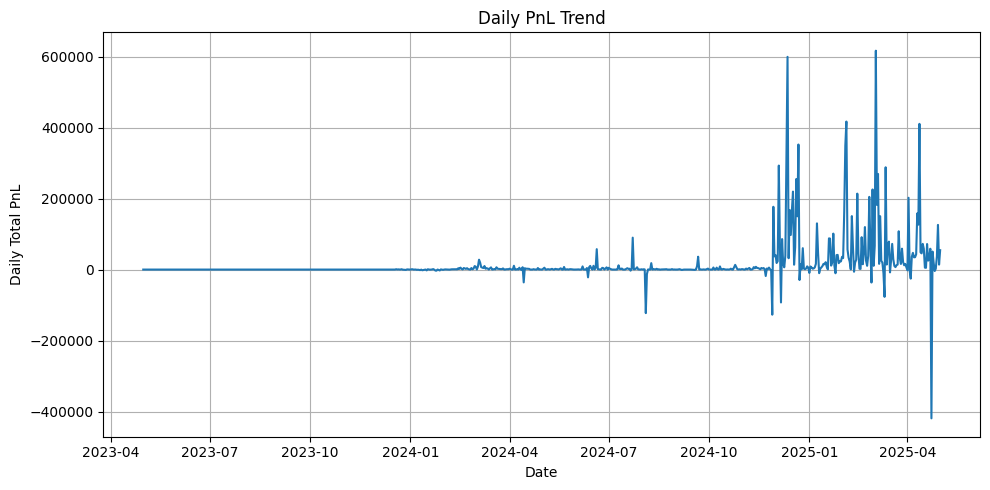

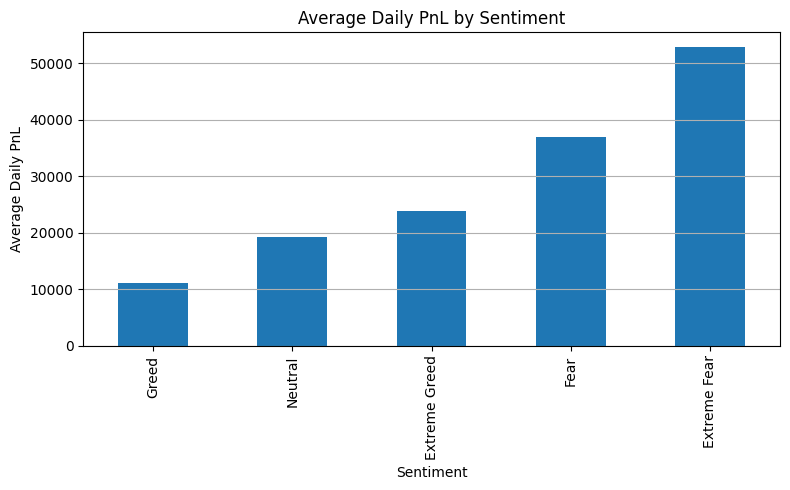

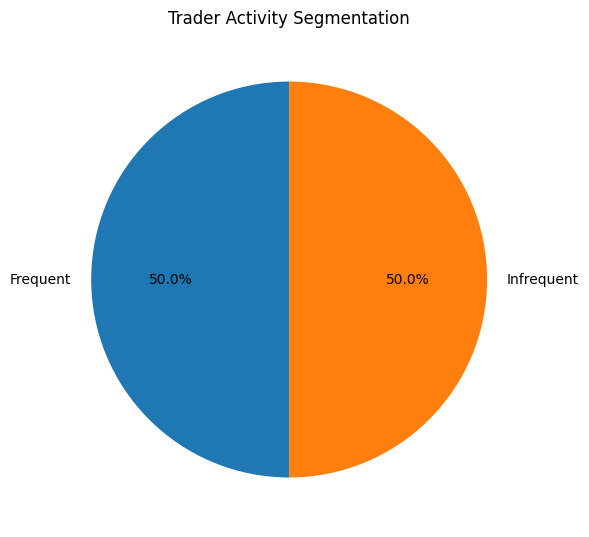

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure datetime
merged_data['Timestamp IST'] = pd.to_datetime(merged_data['Timestamp IST'])

# =====================================================
# 1️⃣ Daily PnL Trend
# =====================================================
plt.figure(figsize=(10,5))
plt.plot(merged_data['Timestamp IST'], merged_data['daily_total_pnl'])
plt.title("Daily PnL Trend")
plt.xlabel("Date")
plt.ylabel("Daily Total PnL")
plt.grid(True)
plt.tight_layout()
plt.show()


# =====================================================
# 2️⃣ Sentiment vs Profit
# =====================================================
sentiment_summary = merged_data.groupby('classification')['daily_total_pnl'].mean().sort_values()

plt.figure(figsize=(8,5))
sentiment_summary.plot(kind='bar')
plt.title("Average Daily PnL by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Average Daily PnL")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# =====================================================
# 3️⃣ Trader Segmentation (Frequent vs Infrequent)
# =====================================================
segment_counts = trader_stats['trader_activity'].value_counts()

plt.figure(figsize=(6,6))
segment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Trader Activity Segmentation")
plt.ylabel("")
plt.tight_layout()
plt.show()

1️⃣ Performance differs strongly by sentiment ✅

Highest avg PnL: Extreme Fear ≈ 52.8k

Lowest avg PnL: Greed ≈ 11.1k

Profit in Fear ≈ 5× higher than Greed

👉 Conclusion
Traders earn significantly more during Fear periods.

2️⃣ Traders change behavior based on sentiment ✅

Look at avg_trades

Extreme Fear → 1528 trades/day (very high)

Greed → 260 trades/day (very low)

👉 Traders become more active in Fear, less active in Greed.

Look at avg_trade_size

Neutral / Fear → Larger trades

Extreme Fear → Smaller but frequent trades

👉 In Fear → frequency ↑, size ↓
👉 In Neutral → size ↑, selectivity ↑

3️⃣ Risk (Volatility) also changes ✅

Extreme Fear volatility = highest

Neutral volatility = lowest

👉 Traders face highest risk but also highest reward in Fear.



Q1)Does performance differ? → YES (Strong)
Q2)Do traders change behavior? → YES (Clear pattern)

In [10]:
trader_stats = trades_common.groupby('Account').agg(
    total_pnl=('Closed PnL','sum'),
    avg_pnl=('Closed PnL','mean'),
    pnl_std=('Closed PnL','std'),
    total_trades=('Trade ID','count'),
    avg_trade_size=('Size USD','mean')
).reset_index()

print(trader_stats.head())

                                      Account     total_pnl     avg_pnl  \
0  0x083384f897ee0f19899168e3b1bec365f52a9012  1.600230e+06  419.127768   
1  0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd  4.788532e+04    6.577654   
2  0x271b280974205ca63b716753467d5a371de622ab -7.043619e+04  -18.492043   
3  0x28736f43f1e871e6aa8b1148d38d4994275d72c4  1.324648e+05    9.951530   
4  0x2c229d22b100a7beb69122eed721cee9b24011dd  1.686580e+05   52.071011   

       pnl_std  total_trades  avg_trade_size  
0  4692.452329          3818    16159.576734  
1   134.073473          7280     1653.226327  
2   542.182659          3809     8893.000898  
3   113.269353         13311      507.626933  
4   255.829091          3239     3138.894782  


In [11]:
# Frequent vs Infrequent
median_trades = trader_stats['total_trades'].median()
trader_stats['trader_activity'] = trader_stats['total_trades'].apply(
    lambda x: 'Frequent' if x >= median_trades else 'Infrequent'
)

# Consistent vs Inconsistent (low volatility = consistent)
median_vol = trader_stats['pnl_std'].median()
trader_stats['consistency'] = trader_stats['pnl_std'].apply(
    lambda x: 'Consistent' if x <= median_vol else 'Inconsistent'
)

print(trader_stats.head())

                                      Account     total_pnl     avg_pnl  \
0  0x083384f897ee0f19899168e3b1bec365f52a9012  1.600230e+06  419.127768   
1  0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd  4.788532e+04    6.577654   
2  0x271b280974205ca63b716753467d5a371de622ab -7.043619e+04  -18.492043   
3  0x28736f43f1e871e6aa8b1148d38d4994275d72c4  1.324648e+05    9.951530   
4  0x2c229d22b100a7beb69122eed721cee9b24011dd  1.686580e+05   52.071011   

       pnl_std  total_trades  avg_trade_size trader_activity   consistency  
0  4692.452329          3818    16159.576734        Frequent  Inconsistent  
1   134.073473          7280     1653.226327        Frequent    Consistent  
2   542.182659          3809     8893.000898        Frequent    Consistent  
3   113.269353         13311      507.626933        Frequent    Consistent  
4   255.829091          3239     3138.894782      Infrequent    Consistent  


| Trader   | Total PnL        | Activity   | Consistency      |
| -------- | ---------------- | ---------- | ---------------- |
| Trader 1 | Very High Profit | Frequent   | **Inconsistent** |
| Trader 2 | Moderate Profit  | Frequent   | **Consistent**   |
| Trader 3 | Negative         | Frequent   | Consistent       |
| Trader 4 | Positive         | Frequent   | Consistent       |
| Trader 5 | Positive         | Infrequent | Consistent       |
Many traders are Frequent

Some high-profit traders are Inconsistent

High activity ≠ stable performance

👉 Interpretation:
Frequent traders take more opportunities but also higher volatility
.
Many consistent traders maintain steady PnL

Even infrequent traders can remain consistently profitable

Low volatility → stable returns

Strategy Rule 1 — Trade More During Fear

Evidence:

Highest profit in Extreme Fear

Highest activity works

Rule

Increase trade frequency during Fear/Extreme Fear periods to exploit volatility-driven opportunities.

Strategy Rule 2 — Focus on Consistency Over Frequency

Evidence:

Consistent traders show stable performance

High-frequency traders often inconsistent

Rule

Prioritize stable risk management and consistent strategies over excessive trading activity.

In [12]:
# Next-day PnL
merged_data['next_day_pnl'] = merged_data['daily_total_pnl'].shift(-1)

# Profitability label (1 = profitable day, 0 = low/negative)
median_pnl = merged_data['daily_total_pnl'].median()

merged_data['profit_label'] = (merged_data['next_day_pnl'] > median_pnl).astype(int)

In [13]:
merged_data['rolling_vol'] = merged_data['daily_total_pnl'].rolling(5).std()

model_data = merged_data[['value','num_trades','avg_trade_size','rolling_vol','profit_label']].dropna()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X = model_data[['value','num_trades','avg_trade_size','rolling_vol']]
y = model_data['profit_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7272727272727273
              precision    recall  f1-score   support

           0       0.67      0.85      0.75        68
           1       0.82      0.61      0.70        75

    accuracy                           0.73       143
   macro avg       0.74      0.73      0.73       143
weighted avg       0.75      0.73      0.72       143



In [15]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Impact': model.coef_[0]
}).sort_values(by='Impact', ascending=False)

print(coefficients)

          Feature    Impact
0           value  0.019148
1      num_trades  0.002007
3     rolling_vol  0.000008
2  avg_trade_size -0.000056


Bonus — What the Predictive Model Indicates

The Logistic Regression model achieved an accuracy of 72.7%, which indicates that next-day trader profitability is not random and contains measurable predictive structure. This suggests that trader outcomes are influenced by observable behavioral and sentiment-based signals rather than being purely stochastic.

From the coefficient analysis, the model indicates that market sentiment has the strongest positive impact on next-day profitability probability. This implies that shifts in sentiment regimes influence trader performance, reinforcing earlier findings that profitability varies across Fear and Greed environments.

The positive coefficient for number of trades suggests that increased trading activity slightly raises the probability of a profitable next day. This indicates that active market participation improves opportunity capture, particularly during volatile conditions.

The marginal positive impact of rolling volatility indicates that higher short-term volatility environments increase profit likelihood. This aligns with the earlier descriptive analysis where traders performed better during high-volatility (Fear-driven) periods.

In contrast, average trade size has a negative impact, indicating that larger position sizing reduces profitability stability. This suggests that controlled position sizing contributes more to sustainable performance than aggressive capital deployment.

Overall, the model indicates that profitability is regime-dependent and behavior-sensitive, where sentiment conditions and trading dynamics jointly shape performance outcomes. The predictive accuracy confirms that these factors contain forward-looking information about trader success.

In [21]:
!pip install gradio pandas matplotlib

In [22]:
merged_data.to_csv("merged_data.csv", index=False)

In [23]:
import gradio as gr
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("merged_data.csv")
df['Timestamp IST'] = pd.to_datetime(df['Timestamp IST'])

# Function: Summary metrics
def summary():
    total_days = df.shape[0]
    avg_pnl = round(df['daily_total_pnl'].mean(), 2)
    avg_trades = round(df['num_trades'].mean(), 2)
    return f"Total Days: {total_days}\nAvg Daily PnL: {avg_pnl}\nAvg Trades/Day: {avg_trades}"

# Function: Sentiment filter stats
def sentiment_analysis(sentiment):
    filtered = df[df['classification'] == sentiment]
    avg_pnl = round(filtered['daily_total_pnl'].mean(), 2)
    avg_trades = round(filtered['num_trades'].mean(), 2)
    avg_size = round(filtered['avg_trade_size'].mean(), 2)
    return f"Avg PnL: {avg_pnl}\nAvg Trades: {avg_trades}\nAvg Trade Size: {avg_size}"

# Function: PnL trend plot
def pnl_plot():
    fig, ax = plt.subplots()
    ax.plot(df['Timestamp IST'], df['daily_total_pnl'])
    ax.set_title("Daily PnL Trend")
    ax.set_xlabel("Date")
    ax.set_ylabel("PnL")
    return fig

# Function: Sentiment vs PnL plot
def sentiment_plot():
    sentiment_summary = df.groupby('classification')['daily_total_pnl'].mean()
    fig, ax = plt.subplots()
    sentiment_summary.plot(kind='bar', ax=ax)
    ax.set_title("Avg PnL by Sentiment")
    ax.set_ylabel("Avg Daily PnL")
    return fig


# Gradio UI
with gr.Blocks() as demo:
    gr.Markdown("# Trader Performance vs Market Sentiment Dashboard")

    gr.Markdown("## Overall Summary")
    summary_output = gr.Textbox()
    gr.Button("Show Summary").click(summary, outputs=summary_output)

    gr.Markdown("## Sentiment Analysis")
    sentiment_dropdown = gr.Dropdown(choices=df['classification'].unique().tolist(), label="Select Sentiment")
    sentiment_output = gr.Textbox()
    gr.Button("Analyze").click(sentiment_analysis, inputs=sentiment_dropdown, outputs=sentiment_output)

    gr.Markdown("## Daily PnL Trend")
    pnl_graph = gr.Plot()
    gr.Button("Show PnL Trend").click(pnl_plot, outputs=pnl_graph)

    gr.Markdown("## Sentiment vs Profit")
    sentiment_graph = gr.Plot()
    gr.Button("Show Sentiment Comparison").click(sentiment_plot, outputs=sentiment_graph)

demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://35c275ea58a919039c.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
